##Context:
We're working for an an e-learning company that offers courses on programming. Most of our courses are on web and mobile development, but we also cover many other domains, like data science, game development, etc. We want to promote our product and we'd like to invest some money in advertisement
##Project goal:
Research for best market to advertise and optimize sale
##Data description
We will use freeCodeCamp's 2017 New Coder Survey of about 18,000 developers available in the following link:
https://github.com/freeCodeCamp/2017-new-coder-survey
The dataset include 18,175 data points and 136 columns about aspriring developers'interest, geography and how much they are willing to pay for their studies.

In [32]:
import pandas as pd
import numpy as np
survey = pd.read_csv('2017-fCC-New-Coders-Survey-Data.csv')

/dataquest/system/env/python3/lib/python3.4/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (17,62) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [33]:
survey.shape

(18175, 136)

In [34]:
survey[:3]

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN


In [35]:
#List all columns
list(survey.columns) 

['Age',
 'AttendedBootcamp',
 'BootcampFinish',
 'BootcampLoanYesNo',
 'BootcampName',
 'BootcampRecommend',
 'ChildrenNumber',
 'CityPopulation',
 'CodeEventConferences',
 'CodeEventDjangoGirls',
 'CodeEventFCC',
 'CodeEventGameJam',
 'CodeEventGirlDev',
 'CodeEventHackathons',
 'CodeEventMeetup',
 'CodeEventNodeSchool',
 'CodeEventNone',
 'CodeEventOther',
 'CodeEventRailsBridge',
 'CodeEventRailsGirls',
 'CodeEventStartUpWknd',
 'CodeEventWkdBootcamps',
 'CodeEventWomenCode',
 'CodeEventWorkshops',
 'CommuteTime',
 'CountryCitizen',
 'CountryLive',
 'EmploymentField',
 'EmploymentFieldOther',
 'EmploymentStatus',
 'EmploymentStatusOther',
 'ExpectedEarning',
 'FinanciallySupporting',
 'FirstDevJob',
 'Gender',
 'GenderOther',
 'HasChildren',
 'HasDebt',
 'HasFinancialDependents',
 'HasHighSpdInternet',
 'HasHomeMortgage',
 'HasServedInMilitary',
 'HasStudentDebt',
 'HomeMortgageOwe',
 'HoursLearning',
 'ID.x',
 'ID.y',
 'Income',
 'IsEthnicMinority',
 'IsReceiveDisabilitiesBenefits'

As we mentioned earlier, most of the courses we offer are on web and mobile development, but we also cover many other domains, like data science, game development, etc. For the purpose of our analysis, we want to answer questions about a population of new coders that are interested in the subjects we teach.

In [36]:
survey['JobRoleInterest'].value_counts(normalize=True, ascending=False)

Full-Stack Web Developer                                                                                                                                                                           0.117706
  Front-End Web Developer                                                                                                                                                                          0.064359
  Data Scientist                                                                                                                                                                                   0.021739
Back-End Web Developer                                                                                                                                                                             0.020309
  Mobile Developer                                                                                                                                                                      

###Findings:
- People can be interested in more than one subject
- A majority is interested in web development
- A minority is interested in mobile development

In [37]:
#Split ',' in each row
interests_no_null = survey['JobRoleInterest'].dropna()
interests_split = interests_no_null.str.split(',')
#Get frequency distribution on the number of option
interest_number = interests_split.apply(lambda x: len(x))
interest_number.value_counts(normalize=True).sort_index()*100

1     31.650458
2     10.883867
3     15.889588
4     15.217391
5     12.042334
6      6.721968
7      3.861556
8      1.759153
9      0.986842
10     0.471968
11     0.185927
12     0.300343
13     0.028604
Name: JobRoleInterest, dtype: float64

Only 31,7% participants know exactly what niche they want to do. However, we also run various courses so the dataset is useful for us. Let's find how many correspondents interested in web and mobile development

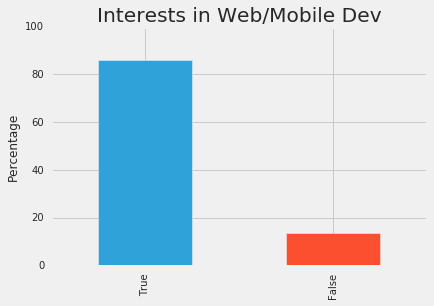

In [38]:
interests_web_mob = interests_no_null.str.contains('Web Developer|Mobile Developer')
interest_per = interests_web_mob.value_counts(normalize=True)*100
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
interest_per.plot.bar(title='Interests in Web/Mobile Dev')
plt.ylabel('Percentage', fontsize = 12)
plt.ylim([0,100])
plt.show()

It turns out a majority of correspondents are interested in Web/Mob Development (87%), we have the right categories of people for our purpose, we can begin analyzing it. We can start with finding out where these new coders are located, and what are the densities for each location.

In [39]:
survey_no_null = survey[survey['JobRoleInterest'].notnull()].copy()
survey_no_null['CountryLive'].value_counts(normalize=True) * 100

United States of America         45.700497
India                             7.721556
United Kingdom                    4.606610
Canada                            3.802281
Poland                            1.915765
Brazil                            1.886517
Germany                           1.828020
Australia                         1.637906
Russia                            1.491664
Ukraine                           1.301550
Nigeria                           1.228429
Spain                             1.126060
France                            1.096812
Romania                           1.038315
Netherlands (Holland, Europe)     0.950570
Italy                             0.906698
Philippines                       0.760456
Serbia                            0.760456
Greece                            0.672711
Ireland                           0.628839
South Africa                      0.570342
Mexico                            0.541094
Turkey                            0.526470
Singapore  

In [40]:
survey_no_null['CountryLive'].value_counts()

United States of America         3125
India                             528
United Kingdom                    315
Canada                            260
Poland                            131
Brazil                            129
Germany                           125
Australia                         112
Russia                            102
Ukraine                            89
Nigeria                            84
Spain                              77
France                             75
Romania                            71
Netherlands (Holland, Europe)      65
Italy                              62
Philippines                        52
Serbia                             52
Greece                             46
Ireland                            43
South Africa                       39
Mexico                             37
Turkey                             36
Singapore                          34
Hungary                            34
New Zealand                        33
Croatia     

We have chosen 'CountryLive' column instead of 'CountryCitizen' as we are only interested in knowing where the correspondents are living right now instead of their nationality.
The four primary markets will be:
- United States of America:         3125
- India:                             528
- United Kingdom:                    315
- Canada:                            260
However, we still need more information on how much the correspondents are willing to pay for their study before we come to our final decision. Advertising within markets where most people are only willing to learn for free is extremely unlikely to be profitable for us.
Our data plan is at $59/month and 'MoneyForLearning' is caaculated as American dollars the amount of money spent by participants from the moment they started coding until the moment they completed the survey. We will need both 'MonthsProgramming' and 'MoneyForLearning' column for this question.

In [41]:
survey_no_null['MonthsProgramming'].value_counts().sort_index()

0.0      235
1.0      767
2.0      669
3.0      637
4.0      367
5.0      279
6.0      654
7.0      124
8.0      195
9.0      102
10.0     144
11.0      39
12.0     616
13.0      36
14.0      76
15.0      70
16.0      58
17.0      20
18.0     160
19.0       7
20.0      92
21.0       9
22.0       5
23.0       4
24.0     422
25.0      12
26.0      17
27.0       8
28.0      13
29.0       6
        ... 
73.0       1
75.0       2
80.0       3
83.0       1
84.0      11
86.0       1
89.0       1
96.0       8
100.0      8
105.0      1
108.0      2
111.0      1
113.0      1
120.0     13
124.0      1
144.0      5
156.0      2
171.0      1
180.0      1
190.0      1
198.0      1
200.0      6
240.0      3
264.0      1
300.0      1
360.0      5
370.0      1
408.0      1
480.0      2
744.0      4
Name: MonthsProgramming, Length: 91, dtype: int64

In [42]:
#Verify 'MonthsProgramming' column
survey_no_null['MonthsProgramming'].replace(0, 1, inplace=True)
survey_no_null = survey_no_null[survey_no_null['MonthsProgramming'] < 400]

In [66]:
# Create new 'MoneyPerMonth' column to describe the amount of money a student has spent per month
survey_no_null['MoneyPerMonth'] = survey_no_null['MoneyForLearning']/survey_no_null['MonthsProgramming']
# Drop all null values
paid_users = survey_no_null[survey_no_null['MoneyPerMonth'].notnull()]
paid_users = paid_users[paid_users['CountryLive'].notnull()]
country_mean = paid_users.groupby(['CountryLive']).mean()
country_mean['MoneyPerMonth'][['United States of America', 'India', 'United Kingdom', 'Canada']]

CountryLive
United States of America    228.384261
India                       135.100982
United Kingdom               45.534443
Canada                      113.510961
Name: MoneyPerMonth, dtype: float64

In [67]:
country_median = paid_users.groupby(['CountryLive']).median()
country_median['MoneyPerMonth'][['United States of America', 'India', 'United Kingdom', 'Canada']]

CountryLive
United States of America    3.333333
India                       0.000000
United Kingdom              0.000000
Canada                      0.000000
Name: MoneyPerMonth, dtype: float64

The result is surprising as we would expect countries such as UK or Canada to spend more compared to India based on GDP per capita. Let's have a closer look at data to see if something is missing.

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


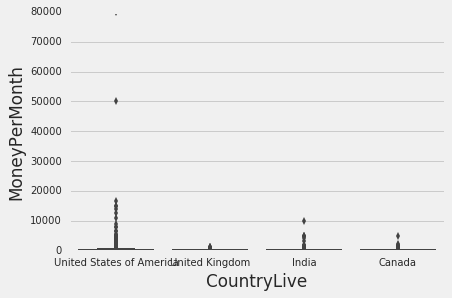

In [68]:
four_countries = paid_users[paid_users['CountryLive'].str.contains('United States of America|India|United Kingdom|Canada')]
import seaborn as sns
sns.boxplot(y='MoneyPerMonth', x='CountryLive', data=four_countries)

There are some outliers in US and India data, let's drop them for now.

In [69]:
#Dropping outliers
four_countries = four_countries[four_countries['MoneyPerMonth'] < 10000]
#Recaculate the mean
country_mean = four_countries.groupby(['CountryLive']).mean()
country_mean['MoneyPerMonth'][['United States of America','United Kingdom','India','Canada']]

CountryLive
United States of America    155.722300
United Kingdom               45.534443
India                       113.748387
Canada                      113.510961
Name: MoneyPerMonth, dtype: float64

The data still seems a bit off. Let's have another closer look

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


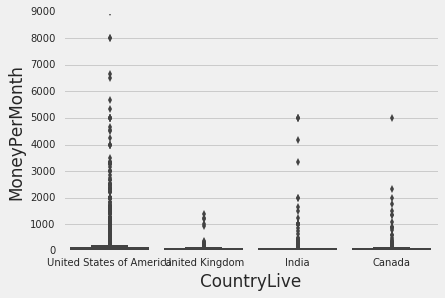

In [70]:
sns.boxplot(y='MoneyPerMonth', x='CountryLive', data=four_countries)

Let look at how many bootcamps each of the Indian outliers have participated.

In [76]:
india_outliers = four_countries[(four_countries.MoneyPerMonth >= 2000) & (four_countries.CountryLive == 'India')]
pd.options.display.max_columns = 150
india_outliers

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,MoneyPerMonth
9410,38.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,1.0,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,India,India,NaN,NaN,Not working but looking for work,NaN,80000.0,1.0,NaN,male,NaN,0.0,1.0,1.0,0.0,0.0,0.0,0.0,NaN,56.0,8243264927866b8acd6811b463bf81d7,6e9ca738bfc01466ff5d0a107f840749,NaN,0.0,0.0,0.0,NaN,Within 7 to 12 months,1.0,NaN,1.0,NaN,1.0,1.0,NaN,1.0,1.0,NaN,1.0,NaN,1.0,work for a multinational corporation,1.0,"User Experience Designer, Data Scientist, ...",in an office with other developers,Marathi,"single, never married",2000.0,1.0,7e9aa65318,2017-04-03 17:10:57,2017-04-03 17:02:59,2017-04-03 17:14:14,2017-04-03 17:11:46,NaN,NaN,1.0,1.0,NaN,1.0,1.0,1.0,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,1.0,NaN,1.0,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,bachelor's degree,Design and Visual Communications,NaN,1.0,1.0,1.0,NaN,NaN,NaN,1.0,1.0,1.0,1.0,NaN,NaN,1.0,1.0,NaN,NaN,NaN,2000.0
12451,24.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,India,India,NaN,NaN,Not working but looking for work,NaN,60000.0,NaN,NaN,male,NaN,NaN,0.0,0.0,1.0,NaN,0.0,NaN,NaN,35.0,7a8ede6a87ea19ab08d19c53e5d7e1da,edfe96b9e599da95611db78dec052f64,NaN,0.0,0.0,0.0,NaN,I haven't decided,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,work for a nonprofit,1.0,"Mobile Developer, Front-End Web Developer",no preference,Odia (Oriya),"single, never married",8000.0,4.0,18a13a29ac,2017-03-13 14:52:40,2017-03-13 14:40:41,2017-03-13 14:54:24,2017-03-13 14:52:44,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,1.0,NaN,1.0,1.0,1.0,bachelor's degree,Information Technology,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,1.0,Na

It seems that these outliers have not participated in many bootcamps at all. We can safely drop them now.

In [77]:
four_countries = four_countries.drop(india_outliers.index)

We will do the same for the 3 remaining countries.

In [78]:
us_outliers = four_countries[(four_countries.MoneyPerMonth >= 6000)&(four_countries.CountryLive == 'United States of America')&(four_countries.AttendedBootcamp == 0)]
four_countries = four_countries.drop(us_outliers.index)

In [79]:
canada_outliers = four_countries[(four_countries.CountryLive=='Canada')&(four_countries.MoneyPerMonth>=4000)&(four_countries.AttendedBootcamp == 0)]
four_countries = four_countries.drop(canada_outliers.index)

In [80]:
country_mean = four_countries.groupby(['CountryLive']).mean()
print(country_mean['MoneyPerMonth'])

CountryLive
Canada                      113.510961
India                        57.256604
United Kingdom               45.534443
United States of America    155.722300
Name: MoneyPerMonth, dtype: float64


##Conclusion:
So we definately would want to spend most of our advertising budget on US market. But Canada market is also a potential market. If our convert rate is at 20%, then using all of it on US seems to be a more reasonalble solution for:
- 20% of 3125 potential US customers will yield in 625 customers, while 20% of 260 potential Canadian customers will only yield 52 customers.
- Language barrier: while US has English as its primary language, only 65% Canadian speak English at home.
However, we could leave the matter of deciding to the marketing team in our company.